# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
#read the data 
data = pd.read_csv("weatherdata.csv")
data

,city,area,altitude,pollution,wind,mintemp,maxtemp,meantemp,minhumid,maxhumid,rainy,meanrain,outlook
0,cOiZY,High,1187.0,15.2,SW,15.7,33.1,24.40,20.680772,35.435411,NaN,0,overcast
1,WuNQU,Mid,904.0,43.3,W,17.6,39.3,28.45,19.819724,66.281048,NaN,0,sunny
2,AiHSZ,High,2050.5,41.3,E,17.9,30.4,24.15,49.067699,70.658360,NaN,0,overcast
3,VMUIS,Mid,2378.7,26.4,NE,19.8,40.0,29.90,29.690542,31.606965,NaN,0,overcast
4,Qmzvp,Low,1630.6,3.8,W,17.6,27.5,22.55,21.312359,26.867255,NaN,0,sunny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,vwRhg,High,944.5,15.0,N,19.0,28.4,23.70,39.196940,52.394667,NaN,0,sunny
346,rhsYN,Low,797.5,10.0,NE,17.2,39.5,28.35,20.480255,81.047379,NaN,0,overcast
347,qFdRT,High,514.9,38.7,SW,19.1,32.3,25.70,46.226265,29.575220,NaN,0,rainy
348,IvcQN,Mid,667.7,14.7,NE,17.7,37.7,27.70,5.225255,44.421913,NaN,0,rainy


In [3]:
#bulk update 
data.rainy =  np.round(np.random.uniform(50,500,len(data)),1)
data.meanrain = np.round(np.random.uniform(20,200,len(data)),1)

In [4]:
data.dtypes

city          object
area          object
altitude     float64
pollution    float64
wind          object
mintemp      float64
maxtemp      float64
meantemp     float64
minhumid     float64
maxhumid     float64
rainy        float64
meanrain     float64
outlook       object
dtype: object

In [ ]:
#?

In [5]:
#let create some bad data then impute
#select 10 random rows
ndx = np.random.randint(0,len(data),10)
ndx

array([ 20, 206, 269, 248, 288, 223, 151, 133, 208, 192])

In [6]:
##update column 'maxhumid' with '?' for the selected rows
data.loc[ndx,'maxhumid'] = "?"

In [7]:
data.dtypes

city          object
area          object
altitude     float64
pollution    float64
wind          object
mintemp      float64
maxtemp      float64
meantemp     float64
minhumid     float64
maxhumid      object
rainy        float64
meanrain     float64
outlook       object
dtype: object

In [ ]:
#anomalies -> bad values

In [8]:
#bulk update "?"
#-9999 ->in company it is said invalid or null

data.maxhumid = data.maxhumid.replace("?",0)

In [9]:
data.dtypes

city          object
area          object
altitude     float64
pollution    float64
wind          object
mintemp      float64
maxtemp      float64
meantemp     float64
minhumid     float64
maxhumid     float64
rainy        float64
meanrain     float64
outlook       object
dtype: object

In [10]:
#for whever we have maxhumid '0' what is its area
#select the area where the max humidity 'maxhumid' is o
data['area'][data.maxhumid == 0]

20      Low
133     Mid
151     Mid
192    High
206    High
208    High
223     Low
248    High
269     Low
288     Mid
Name: area, dtype: object

In [11]:
#impute the column 'maxhumid' as average (maxhumid) group by the 'area'

m_humid = data.groupby('area').maxhumid.mean()
m_humid

area
High    53.373448
Low     57.220752
Mid     55.586128
Name: maxhumid, dtype: float64

In [12]:
m_humid[0]

53.37344815095574

In [13]:
m_humid[1]

57.22075153405767

In [14]:
m_humid[2]

55.586128359504265

In [17]:
#area = 'High'
ndx = data.maxhumid[(data.area =='High')&(data.maxhumid == 0)].index



In [19]:
#before  update ,values = 0
data.maxhumid[data.index.isin(ndx)]

192    0.0
206    0.0
208    0.0
248    0.0
Name: maxhumid, dtype: float64

In [20]:
#update
data.maxhumid[(data.area =='High')&(data.maxhumid == 0)] = m_humid[0]


C:\Users\mayur\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
#after update 
data.maxhumid[data.index.isin(ndx)]

192    53.373448
206    53.373448
208    53.373448
248    53.373448
Name: maxhumid, dtype: float64

In [24]:
#
ndx = data.maxhumid[(data.area =='Low')&(data.maxhumid == 0)].index
data.maxhumid[data.index.isin(ndx)]
data.maxhumid[(data.area =='Low')&(data.maxhumid == 0)] = m_humid[1]
data.maxhumid[data.index.isin(ndx)]

C:\Users\mayur\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


20     57.220752
223    57.220752
269    57.220752
Name: maxhumid, dtype: float64

In [25]:
ndx = data.maxhumid[(data.area =='Mid')&(data.maxhumid == 0)].index
data.maxhumid[data.index.isin(ndx)]
data.maxhumid[(data.area =='Mid')&(data.maxhumid == 0)] = m_humid[2]
data.maxhumid[data.index.isin(ndx)]

C:\Users\mayur\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


133    55.586128
151    55.586128
288    55.586128
Name: maxhumid, dtype: float64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       350 non-null    object 
 1   area       350 non-null    object 
 2   altitude   350 non-null    float64
 3   pollution  350 non-null    float64
 4   wind       350 non-null    object 
 5   mintemp    350 non-null    float64
 6   maxtemp    350 non-null    float64
 7   meantemp   350 non-null    float64
 8   minhumid   350 non-null    float64
 9   maxhumid   350 non-null    float64
 10  rainy      350 non-null    float64
 11  meanrain   350 non-null    float64
 12  outlook    350 non-null    object 
dtypes: float64(9), object(4)
memory usage: 35.7+ KB


In [ ]:
#eda for number and factor columns

In [31]:
#split numeric and factor columns
#numeric columns
nc = data.select_dtypes(exclude = 'object').columns.values
print(nc)

['altitude' 'pollution' 'mintemp' 'maxtemp' 'meantemp' 'minhumid'
 'maxhumid' 'rainy' 'meanrain']


In [33]:
#factor 
fc = list(data.select_dtypes(include = 'object').columns.values)
print(fc)               #


['city', 'area', 'wind', 'outlook']


In [34]:
fc.remove('city')
fc

['area', 'wind', 'outlook']

In [36]:
for f in fc:
    print("columns = ", f ,"\n",data[f].unique(),"\n")

columns =  area 
 ['High' 'Mid' 'Low'] 

columns =  wind 
 ['SW' 'W' 'E' 'NE' 'N' 'S'] 

columns =  outlook 
 ['overcast' 'sunny' 'rainy'] 



In [ ]:
#correlation on numeric data -  using the heatmap

In [37]:
#1)create the corelation matrix using corr()
cor = data[nc].corr()


In [39]:
#2) take the lower triangle
cor = np.tril(cor)
cor

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.08673746,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.03054303,  0.06496921,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.03998485, -0.02153747, -0.05703613,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.03206038, -0.0056545 ,  0.18322643,  0.97101989,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.0014112 ,  0.02908206,  0.04946088, -0.08022274, -0.06715286,
         1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.04338962,  0.00711368, -0.01635801,  0.10052617,  0.09506956,
         0.03670052,  1.        ,  0.        ,  0.        ],
       [ 0.04494873,  0.09526198,  0.0073359 ,  0.0120084 ,  0

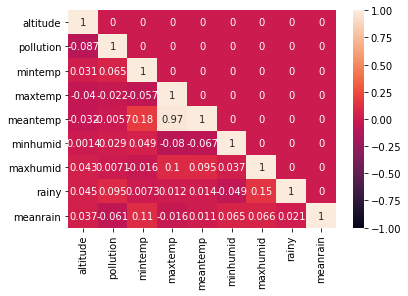

In [40]:
#draw the heatmap
sns.heatmap(cor,annot= True,xticklabels = nc,yticklabels = nc, vmin = -1,vmax= 1,square =False)   #means method = number like R,, 